In [18]:
import pandas as pd
import numpy as np
import matplotlib as mp
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

# Part A

In [19]:
# 1. Download the “dataset_lm.csv” file from Canvas and upload it to Jupyter Notebook.

df = pd.read_csv('https://raw.githubusercontent.com/EthanRosehart/PM_Assignments/refs/heads/main/dataset_lm.csv')

In [20]:
# Verify Dataset 

df.head(10)

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543
5,59.313030,-1.625179,74.795225,0,-27.917682,43.443319,6.971366,78.497117,0,-38.808025,52.181380,16.974969,58.124156,1,-9.023169,55.840461
6,43.302299,17.177045,49.674376,1,-23.490245,58.160871,15.996831,49.845730,3,-24.849489,51.781663,8.667649,72.365524,0,-22.942562,49.120537
7,25.919500,-3.606102,52.838652,0,-20.780413,52.866009,23.282374,68.007436,0,-24.574748,54.423094,8.551908,53.560828,1,-6.769081,48.255181
8,30.353577,4.052598,45.221950,1,-23.692647,44.708397,19.821684,73.394895,3,-28.983295,57.622157,14.581353,55.468061,0,-13.611744,57.230137
9,51.590542,9.369535,55.801956,1,-26.457209,42.325602,-2.058181,74.935838,3,-28.052593,44.794664,2.789562,55.077621,1,-20.948876,55.317270


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

In [22]:
# 2. Run the OLS model by using the dependent and explanatory variables in the dataset.

# Defining the dependent and independent variables
X_columns = [
    'Explanatory Var #1', 'Explanatory Var #2', 'Explanatory Var #3', 'Explanatory Var #4',
    'Explanatory Var #5', 'Explanatory Var #6', 'Explanatory Var #7', 'Explanatory Var #8',
    'Explanatory Var #9', 'Explanatory Var #10', 'Explanatory Var #11', 'Explanatory Var #12',
    'Explanatory Var #13', 'Explanatory Var #14', 'Explanatory Var #15'
]

X = df[X_columns]
y = df['Dependent Var']

# Add constant to X variables
X = sm.add_constant(X) 

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Output the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.506e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:08:07   Log-Likelihood:                 12271.
No. Observations:                 422   AIC:                        -2.451e+04
Df Residuals:                     406   BIC:                        -2.445e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   5

In [23]:
# Run the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Output the test results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for label, result in zip(labels, bp_test):
    print(f'{label}: {result}')

Lagrange multiplier statistic: 262.7044035067699
p-value: 2.9787679224381506e-47
f-value: 44.63734515024982
f p-value: 3.610278779651127e-76


# Part B

In [24]:
# 1. Use error values from the OLS model to calculate their standard deviation and
# autocorrelation values for the first three lags.

# Calculate error values (residuals) from the OLS model
residuals = model.resid

# Standard deviation of residuals
std_dev_residuals = residuals.std()

# Autocorrelation for the first three lags
autocorrelation_lags = [residuals.autocorr(lag=i) for i in range(1, 4)]

# Print results
print(f"Standard Deviation of Residuals: {std_dev_residuals}")
print(f"Autocorrelation (Lag 1): {autocorrelation_lags[0]}")
print(f"Autocorrelation (Lag 2): {autocorrelation_lags[1]}")
print(f"Autocorrelation (Lag 3): {autocorrelation_lags[2]}")

Standard Deviation of Residuals: 3.6628059790163535e-14
Autocorrelation (Lag 1): 0.025670176340677635
Autocorrelation (Lag 2): -0.025167006405992433
Autocorrelation (Lag 3): 0.004647515690314895


In [25]:
# 2. Then, run the GLS model accordingly.

# Fit the GLS model
model_gls = sm.GLS(y, X).fit()

# Output the summary of the GLS model
print(model_gls.summary())

                            GLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.506e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:08:07   Log-Likelihood:                 12271.
No. Observations:                 422   AIC:                        -2.451e+04
Df Residuals:                     406   BIC:                        -2.445e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   5

# Part C

In [26]:
# 1. Split the dataset into two as the training and test sets (test size = 0.5).

# Split the dataset into training and test sets (50% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Display the sizes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (211, 16)
X_test shape: (211, 16)
y_train shape: (211,)
y_test shape: (211,)


In [27]:
# 2. Run the Lasso model with alpha=1 and estimate the coefficients using the training set.

# Initialize the Lasso model with alpha = 1
lasso_model = Lasso(alpha=1)

# Fit the model using the training data
lasso_model.fit(X_train, y_train)

# Retrieve and display the estimated coefficients
print(lasso_model.coef_)

[ 0.          1.26972628  1.68394638  2.02626245  2.08756512 -0.91746375
 -0.          0.         -0.          0.         -0.          0.01314162
  0.         -0.          0.         -0.03617731]


In [28]:
# 3. Then, calculate the mean absolute percentage error using the test set.

# Predict using the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 0.04432190198291579


In [29]:
# 4. Find an approximate value for alpha that minimizes the mean absolute percentage error.

# Set up a range of alpha values to test
alpha_range = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Set up Lasso with GridSearch to find the best alpha
lasso_grid = GridSearchCV(Lasso(), alpha_range, scoring='neg_mean_absolute_percentage_error', cv=5)

# Fit the model on the training data
lasso_grid.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_grid.best_params_['alpha']

# Get the corresponding MAPE for the best alpha
best_mape = -lasso_grid.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best MAPE: {best_mape}")

Best alpha: 0.001
Best MAPE: 3.9403417133145146e-05


# Part D

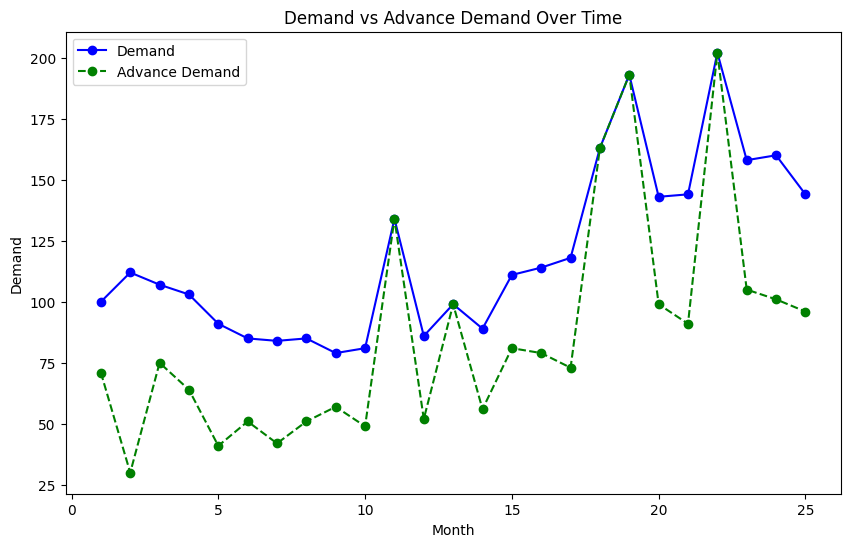

In [30]:
import matplotlib.pyplot as plt

# Input the data from the image manually
data = {
    'Month': list(range(1, 26)),
    'Demand': [100, 112, 107, 103, 91, 85, 84, 85, 79, 81,
               134, 86, 99, 89, 111, 114, 118, 163, 193, 143,
               144, 202, 158, 160, 144],
    'Advance_Demand': [71, 30, 75, 64, 41, 51, 42, 51, 57, 49,
                       134, 52, 99, 56, 81, 79, 73, 163, 193, 99,
                       91, 202, 105, 101, 96]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plotting both Demand and Advanced Demand on the same plot
plt.plot(data['Month'], data['Demand'], label='Demand', marker='o', linestyle='-', color='blue')
plt.plot(data['Month'], data['Advance_Demand'], label='Advance Demand', marker='o', linestyle='--', color='green')

# Adding titles and labels
plt.title('Demand vs Advance Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Demand')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [31]:
# 1. Use the demand data given in the table and develop an appropriate forecasting model

# Define features and target variable
X = df[['Advance_Demand']]
y = df['Demand']

# Split the data into training and test sets (20 months for training, 5 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Lasso model with regularization parameter alpha (tunable)
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Apply the condition where if advance demand is more than 40% of forecasted demand,
# use the advance demand instead of the forecasted value.
final_predictions = []
for i in range(len(y_pred)):
    forecasted = y_pred[i]
    advance = X_test.iloc[i]['Advance_Demand']
    if advance > 0.4 * forecasted:
        final_predictions.append(advance)
    else:
        final_predictions.append(forecasted)

# Create a DataFrame for comparison of actual and predicted values
forecast = pd.DataFrame({
    'Month': df['Month'].iloc[X_test.index],
    'Advance Demand': df['Advance_Demand'].iloc[X_test.index],
    'Forecasted Demand': y_pred,
    'Final Forecast': final_predictions,
    'Actual Demand': y_test
})

print(forecast)

# Explanation of Adjustments: Forecast Calculation: We first calculate the forecasted demand 
# using the Lasso model as before.Condition Application: After obtaining the forecast, 
# we check if the advance demand is greater than 40% of the forecasted demand. If it is, we use the advance 
# demand instead of the forecasted value. Final Forecast: The final forecast takes into account this condition, 
# and we replace the forecast with advance demand where applicable.

    Month  Advance Demand  Forecasted Demand  Final Forecast  Actual Demand
20     21              91         117.150036              91            144
21     22             202         188.019571             202            202
22     23             105         126.088536             105            158
23     24             101         123.534679             101            160
24     25              96         120.342357              96            144


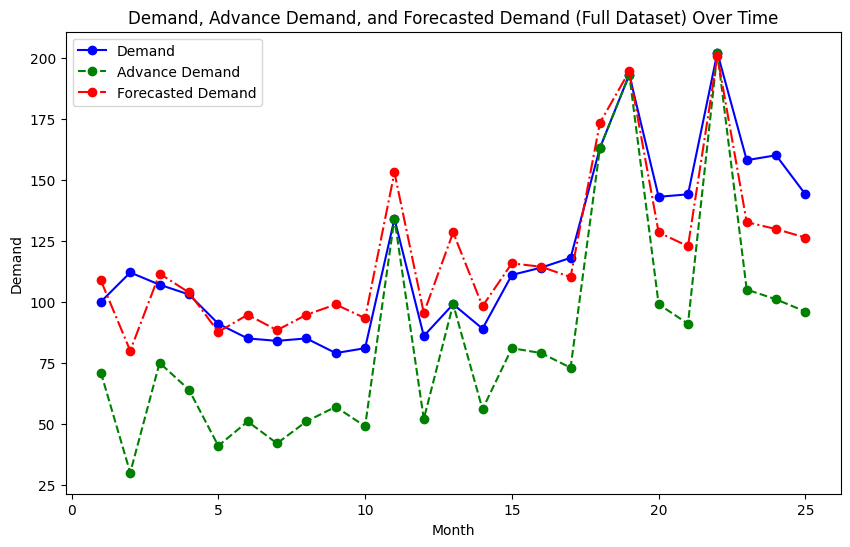

In [32]:
# Fit the Lasso model on the entire dataset for forecasting
lasso.fit(X, y)

# Make predictions on the entire dataset
y_full_pred = lasso.predict(X)

# Update the DataFrame with the full forecasted predictions
df['Forecasted_Demand'] = y_full_pred

# Plot the three lines: Actual Demand, Advance Demand, and Forecasted Demand (for the entire dataset)

plt.figure(figsize=(10, 6))

# Plotting the original Demand and Advance Demand
plt.plot(df['Month'], df['Demand'], label='Demand', marker='o', linestyle='-', color='blue')
plt.plot(df['Month'], df['Advance_Demand'], label='Advance Demand', marker='o', linestyle='--', color='green')

# Plotting the Forecasted Demand (third line)
plt.plot(df['Month'], df['Forecasted_Demand'], label='Forecasted Demand', marker='o', linestyle='-.', color='red')

# Adding titles and labels
plt.title('Demand, Advance Demand, and Forecasted Demand (Full Dataset) Over Time')
plt.xlabel('Month')
plt.ylabel('Demand')

# Adding a legend
plt.legend()

# Show the plot
plt.show()